In [1]:
import cma
import numpy as np
help(cma.fmin)

Help on function fmin in module cma.evolution_strategy:

fmin(objective_function, x0, sigma0, options=None, args=(), gradf=None, restarts=0, restart_from_best='False', incpopsize=2, eval_initial_x=False, parallel_objective=None, noise_handler=None, noise_change_sigma_exponent=1, noise_kappa_exponent=0, bipop=False, callback=None)
    functional interface to the stochastic optimizer CMA-ES
    for non-convex function minimization.
    
    `fmin2` provides the cleaner return values.
    
    Calling Sequences
    ``fmin(objective_function, x0, sigma0)``
        minimizes ``objective_function`` starting at ``x0`` and with
        standard deviation ``sigma0`` (step-size)
    ``fmin(objective_function, x0, sigma0, options={'ftarget': 1e-5})``
        minimizes ``objective_function`` up to target function value 1e-5,
        which is typically useful for benchmarking.
    ``fmin(objective_function, x0, sigma0, args=('f',))``
        minimizes ``objective_function`` called with an additiona

In [34]:
'Funktion definieren'
LOWER = -10
UPPER = 10


def f(x):
    return x[0]**3 - x[1]**3 + x[1]**2 + 1000* np.cos(x[0])*np.sin(x[1])

#Gleichverteilte Startwerte 
x0=np.linspace(-10,10,num=20)
y0=np.linspace(-10,10,num=20)

X0,Y0=np.meshgrid(x0,y0)  #Gitter mit allen möglichen Kombinationen

kombination=np.column_stack((X0.ravel(),Y0.ravel())) #Erzeugt 2-D Array

alle_startwert=kombination.reshape(-1) #Wieder zu 1-D Array

print(len(alle_startwert))
print(alle_startwert[2])

for i in range(len(alle_startwert)):
    startwert=np.array([i,i])

print(startwert)

800
-8.947368421052632
[799 799]


In [23]:

'Test von CMA-EA'
#cma_f=cma.fmin() #Argmumente: 1.Funktion , 2.Startwert , 3.Sigma=0.5 , 4.maxfevals='500' , 
cma.CMAOptions()

cma_f=cma.fmin(f, startwert, 0.5, options={'maxfevals': 500})
cma_f[0] #aktuelle Lösung, abhängig von Startwert

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=272796, Tue Jun 11 11:07:05 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 -6.995759730943689e+02 1.0e+00 6.84e-01  8e-01  8e-01 0:00.0
    2     12 -6.681002624007274e+02 1.7e+00 8.11e-01  9e-01  1e+00 0:00.0
    3     18 -7.674072082106188e+02 2.0e+00 8.29e-01  9e-01  9e-01 0:00.0
   84    504 -9.937117738741703e+02 1.7e+00 6.97e-06  6e-09  8e-09 0:00.2
termination on maxfevals=500 (Tue Jun 11 11:07:06 2024)
final/bestever f-value = -9.937118e+02 -9.937118e+02 after 505/475 evaluations
incumbent solution: [-8.457386253942167e-09, -1.5603711133650289]
std deviation: [7.68430417027643e-09, 6.2858311600590075e-09]


array([ 5.51756038e-09, -1.56037112e+00])

In [1]:
import cma
import numpy as np

# Definition der Zielfunktion
def funktion(x):
    return x[0]**3 - x[1]**3 + x[1]**2 + 1000 * np.cos(x[0]) * np.sin(x[1])

Upperbound=10
Lowerbound=-10

wiederholung=5 #Rechenzeit viel zu groß für 10 Wiederholungen

# Funktion zur Optimierung mit CMA-ES und fmin()
def optimize_cma_es(mu, lambda_,wiederholung):
    all_opt_result=[]
    
    for i in range(wiederholung):
        x_wert=np.linspace(-10,10,20) #x-Startwerte gleichverteilt auf -10 bis 10
        y_wert=np.linspace(-10,10,20) #y-Startwerte analog
        start_values = np.transpose([np.tile(x_wert, len(y_wert)), np.repeat(y_wert, len(x_wert))])
        opt_results=[]

        for start_value in start_values:
            options = {
                'popsize': lambda_,
                'CMA_mu': mu,
                'tolfun': 1e-11,  # Stoppkriterium für die Änderung des Zielfunktionswerts
                'maxfevals': 500,  #Budget von 500 Auswertungen
                'bounds': [-10, 10],
                'verb_disp': 0,  # Um die Konsolenausgabe zu minimieren
            }
            result = cma.fmin(funktion, start_value, 0.5, options=options)
            opt_results.append(result[1])

        all_opt_result.extend(opt_results)  
        
    return all_opt_result

# Verschiedene Parameterkombinationen testen
results = []
for mu in [2,4]: #range(2,10)
    #print(mu)
    for lambda_ in [4,8]: #range(2,10)  #Lamda muss größer gleich als mu sein
        if mu<=lambda_:
            #print(lambda_)
            result = optimize_cma_es(mu, lambda_,wiederholung)
            evals_used = result[4]  # Anzahl der Funktionsevaluationen
            deviation = evals_used - 500  # Abweichung vom Soll-Wert
            results.append((mu, lambda_, result, evals_used, deviation))
        else:
            print(f'Mu muss kleiner als Lamda sein')

# Beste Kombination basierend auf dem niedrigsten Zielfunktionswert finden und kleinste Abweichung zu Soll-Wert  
best_result = min(results, key=lambda x: (x[2][1], abs(x[4])))  
#print(best_result)
#print(results)
print(f"Beste Parameterkombination: mu = {best_result[0]}, lambda = {best_result[1]}")
print(f"Minimaler Zielfunktionswert: {best_result[2][1]}")
print(f"Anzahl der Funktionsevaluationen: {best_result[3]}")
print(f"Abweichung vom Soll-Wert: {best_result[4]}")




mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2

/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.0165666883927527) = 2.763689848197535 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=5)
  warnings.warn(msg + ' (' +


mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.034634129411156) = 2.8140764594418743 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=5)
  warnings.warn(msg + ' (' +


mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2

/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.016254301891017) = 2.7628266436277222 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=1)
  warnings.warn(msg + ' (' +


mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2
mu = 2

/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.0459510500724947) = 2.8461040243532123 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=11)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.0786560260627178) = 2.940724636741434 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=2)
  warnings.warn(msg + ' (' +


mu = 4


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.0567490310025534) = 2.8770027228894395 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=47)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4

/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.1805028446624481) = 3.2560110590949156 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=60)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.2073680536875537) = 3.3446700658317288 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=95)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.1774737498999375) = 3.24616321560454 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=47)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.1959534741706015) = 3.3067091296379587 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=66)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.1950318185215838) = 3.3036628864982043 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=4)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.0475913281718692) = 2.85077625728602 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=40)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.0072849730385525) = 2.738156744506213 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=68)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4

/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.2260595381856623) = 3.4077748382153543 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=6)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.0872204495661404) = 2.966018406609401 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=116)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.1881800146399346) = 3.2811042083834976 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=3)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.0344598017682765) = 2.8135859308834026 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=15)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4

/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.0757937159785032) = 2.9323194058858535 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=96)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.1876445532422781) = 3.2793477740315833 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=28)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.0674864701473616) = 2.908060808300229 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=80)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.0087085518947991) = 2.7420575024122553 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=4)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.0331716527183556) = 2.8099639461685877 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=10)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.05359835144285) = 2.8679524739210907 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=95)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.0637729452434848) = 2.897281678736909 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=29)
  warnings.warn(msg + ' (' +


mu = 4


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.040195221885215) = 2.829769393347264 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=8)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4


/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.0007230995432925) = 2.720248127637086 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=18)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4

/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.1263190266885286) = 3.0842824178557255 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=27)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4

/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.026108116014172) = 2.7901855974776253 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=105)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4

/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.013363727562741) = 2.7548520190333505 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=5)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4

/home/adrian/.local/conda/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.0828439071943616) = 2.9530658657239433 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=2)
  warnings.warn(msg + ' (' +


mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4
mu = 4

Die Berechnungszeit war trotz reduzierter Anzahl der Wiederholungen (von 10 auf 5) immernoch so hoch, dass auch die Anzahl an mu und lambda reduziert werden musste.

Ich hätte gerne mehr Paramterkombinationen von mu und lambda getestet, aber bereits mit nur 4 Möglichkeiten und 5 Wiederholungen hat der Algorithmus knapp eine Stunde gebraucht.

In [9]:
print(results)

#Berechnung der Median der Zielfunktionswerte
for res in results:
    mu, lambda_, opt_results, evals_used, deviation = res
    median_val = np.median(opt_results)
    print(f"Parameterkombination: mu = {mu}, lambda = {lambda_}, Median der Zielfunktionswerte = {median_val}")




[(2, 4, [-356.47262536381385, -356.47262536381385, -1751.1708196249124, -2313.6430855263234, -728.6092907377796, 524.1375412637462, 524.1375412637461, 524.1375412637461, 524.1375412637462, -728.6092907377797, -473.11477035422047, 586.2060867211551, 586.2060867211551, 586.2060867211551, 586.2060867211551, -1444.0211108893698, -752.4291708016835, -1469.312656835206, 1333.0028622443137, 1333.0028622443137, -356.47262536381385, -356.47262536381385, -728.6092907377797, -728.6092907377797, -728.6092907377797, -728.6092907377797, 524.1375412637462, 524.1375412637462, -473.11477035422047, -473.1147703542205, -473.1147703542205, -1249.0621038546146, 586.2060867211551, -2313.643085526323, -231.95572065952456, -231.95572065952467, -231.95572065952467, -231.95572065952467, -231.95572065952467, -752.4291708016835, -1751.1708196249122, -1751.1708196249122, -728.6092907377797, -728.6092907377797, -728.6092907377797, -728.6092907377797, -907.4096246335494, -907.4096246335495, -473.11477035422047, -473

In [10]:
#Berechnung Median der 5 Zielfunktionswerte 


all_opt_results = [res[2] for res in results] #Enthält alle Zielfunktionswerte für jede Parameterkombination
combined_results = [val for sublist in all_opt_results for val in sublist] #Kombinierte Liste

median_val = np.median(combined_results)
print(f"Median der Zielfunktionswerte der Multi-Starts: {median_val}")

Median der Zielfunktionswerte der Multi-Starts: -993.7117738741701


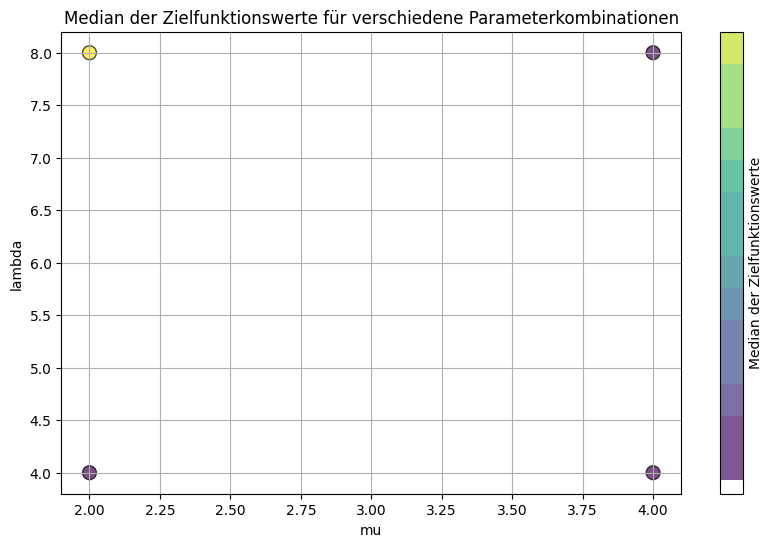

In [12]:
#Visualisierung als Streudiagramm
import matplotlib.pyplot as plt

mu_values = [res[0] for res in results]
lambda_values = [res[1] for res in results]
median_values = [np.median(res[2]) for res in results]

plt.figure(figsize=(10, 6))
plt.scatter(mu_values, lambda_values, c=median_values, cmap='viridis', s=100, edgecolors='k', alpha=0.7)
plt.colorbar(label='Median der Zielfunktionswerte')
plt.xlabel('mu')
plt.ylabel('lambda')
plt.title('Median der Zielfunktionswerte für verschiedene Parameterkombinationen')
plt.grid(True)
plt.show()

Die Grafik zeigt, dass eine Kombination von mu=2 mit lamda=8 , einen kleinen Median der Zielfunktionswerte ergibt.

Die Andern Parameterkombinationen erzeugen einen ähnlichen Median-Wert , welcher schlechter ist.